## Loading Olympic edition DataFrame


In this chapter, you'll be using The Guardian's Olympic medal dataset.

Your first task here is to prepare a DataFrame editions from a tab-separated values (TSV) file.

Initially, editions has 26 rows (one for each Olympic edition, i.e., a year in which the Olympics was held) and 7 columns: 'Edition', 'Bronze', 'Gold', 'Silver', 'Grand Total', 'City', and 'Country'.

For the analysis that follows, you won't need the overall medal counts, so you want to keep only the useful columns from editions: 'Edition', 'Grand Total', City, and Country.

--------------------------------------------------------------------
- Read file_path into a DataFrame called editions. The identifier file_path has been pre-defined with the filename 

   -- 'Summer Olympic medallists 1896 to 2008 - EDITIONS.tsv'. 

   -- You'll have to use the option sep='\t' because the file uses tabs to delimit fields (pd.read_csv() expects commas by default).


- Select only the columns 'Edition', 'Grand Total', 'City', and 'Country' from editions.
- Print the final DataFrame editions in entirety (there are only 26 rows).
-----------------------------------------------------------------------

In [21]:
#Import pandas
import pandas as pd

# Create file path: file_path
file_path = 'Summer Olympic medallists 1896 to 2008 - EDITIONS.tsv'

# Load DataFrame from file_path: editions
editions = pd.read_csv('C:\\Users\\JihongJeong\\Summer Olympic medalists 1896 to 2008 - EDITIONS.tsv', '\t')

# Extract the relevant columns: editions
editions = editions[['Edition', 'Grand Total', 'City', 'Country']]

# Print editions DataFrame
print(editions)

    Edition  Grand Total         City                     Country
0      1896          151       Athens                      Greece
1      1900          512        Paris                      France
2      1904          470    St. Louis               United States
3      1908          804       London              United Kingdom
4      1912          885    Stockholm                      Sweden
5      1920         1298      Antwerp                     Belgium
6      1924          884        Paris                      France
7      1928          710    Amsterdam                 Netherlands
8      1932          615  Los Angeles               United States
9      1936          875       Berlin                     Germany
10     1948          814       London              United Kingdom
11     1952          889     Helsinki                     Finland
12     1956          885    Melbourne                   Australia
13     1960          882         Rome                       Italy
14     196

## Loading IOC codes DataFrame

Your task here is to prepare a DataFrame ioc_codes from a comma-separated values (CSV) file.

Initially, ioc_codes has 200 rows (one for each country) and 3 columns: 'Country', 'NOC', & 'ISO code'.

For the analysis that follows, you want to keep only the useful columns from ioc_codes: 'Country' and 'NOC' (the column 'NOC' contains three-letter codes representing each country).

-------------------------------------------------------
- Read file_path into a DataFrame called ioc_codes. The identifier file_path has been pre-defined with the filename   
   'Summer Olympic medallists 1896 to 2008 - IOC COUNTRY CODES.csv'.


- Select only the columns 'Country' and 'NOC' from ioc_codes.

- Print the leading 5 and trailing 5 rows of the DataFrame ioc_codes (there are 200 rows in total).
--------------------------------------------------------

In [23]:
# Create the file path: file_path
file_path = 'Summer Olympic medallists 1896 to 2008 - IOC COUNTRY CODES.csv'

# Load DataFrame from file_path: ioc_codes
ioc_codes = pd.read_csv('C:\\Users\\JihongJeong\\Summer Olympic medalists 1896 to 2008 - IOC COUNTRY CODES.csv')

# Extract the relevant columns: ioc_codes
ioc_codes = ioc_codes[['Country', 'NOC']]

# Print first and last 5 rows of ioc_codes
display(ioc_codes)


,Country,NOC
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,ALG
3,American Samoa*,ASA
4,Andorra,AND
...,...,...
196,Vietnam,VIE
197,Virgin Islands*,ISV
198,Yemen,YEM
199,Zambia,ZAM


-  Generate csv files named with summer_xxxx.csv from 'Summer Olympic medalists 1896 to 2008 - ALL MEDALISTS.tsv'
- xxxx should be year (e.g., 1896)
- The number of csv files to be generated to be equal to the number of different years from 1896 to 2008
- Drop the "Edition" and "City" columns from the dataframe
- Save the dataframe as summer_xxxx.csv





In [33]:
## Generate csv files (summer_xxxx.csv)
summer = pd.read_csv('C:\\Users\\JihongJeong\\Summer Olympic medalists 1896 to 2008 - ALL MEDALISTS.tsv', '\t')

#display(summer)

for i in range(1896, 2009, 4):
    df = summer
    df = df[df['Edition']==i]
    df = df[['Sport', 'Discipline', 'Athlete', 'NOC', 'Gender', 'Event', 'Event_gender', 'Medal']]
    df.to_csv('C:\\Users\\JihongJeong\\summer_'+str(i)+'.csv')



## Building medals DataFrame

Here, you'll start with the DataFrame editions from the previous exercise.

You have a sequence of files summer_1896.csv, summer_1900.csv, …, summer_2008.csv, one for each Olympic edition (year).

You will build up a dictionary medals_dict with the Olympic editions (years) as keys and DataFrames as values.

The dictionary is built up inside a loop over the year of each Olympic edition (from the Index of editions).

Once the dictionary of DataFrames is built up, you will combine the DataFrames using pd.concat().

------------------------------------------------------
Within the for loop:
- Create the file path. This has been done for you.
- Read file_path into a DataFrame. Assign the result to the year key of medals_dict.
- Select only the columns 'Athlete', 'NOC', and 'Medal' from medals_dict[year].
- Create a new column called 'Edition' in the DataFrame medals_dict[year] whose entries are all year.


Concatenate the dictionary of DataFrames medals_dict into a DataFame called medals. Specify the keyword argument ignore_index=True to prevent repeated integer indices.

Print the first and last 5 rows of medals.

------------------------------------

In [48]:
# Create empty dictionary: medals_dict
medals_dict = {}

for year in editions['Edition']:

    # Create the file path: file_path for each of summer_xxxx.csv
    file_path = 'C:\\Users\\JihongJeong\\summer_'+str(year)+'.csv'
    
    # Load file_path into a DataFrame: medals_dict[year]
    medals_dict[year] = pd.read_csv(file_path)
    
    # Extract relevant columns: medals_dict[year]
    medals_dict[year] = medals_dict[year][['Athlete', 'NOC', 'Medal']]
    
    # Assign year to column 'Edition' of medals_dict
    medals_dict[year]['Edition'] = year
    
# Concatenate medals_dict: medals
medals = medals_dict[1896]

for year in medals_dict.keys():
    medals = pd.concat([medals, medals_dict[year]], ignore_index = True)

# Print first and last 5 rows of medals
display(medals)


,Athlete,NOC,Medal,Edition
0,"HAJOS, Alfred",HUN,Gold,1896
1,"HERSCHMANN, Otto",AUT,Silver,1896
2,"DRIVAS, Dimitrios",GRE,Bronze,1896
3,"MALOKINIS, Ioannis",GRE,Gold,1896
4,"CHASAPIS, Spiridon",GRE,Silver,1896
...,...,...,...,...
29362,"ENGLICH, Mirko",GER,Silver,2008
29363,"MIZGAITIS, Mindaugas",LTU,Bronze,2008
29364,"PATRIKEEV, Yuri",ARM,Bronze,2008
29365,"LOPEZ, Mijain",CUB,Gold,2008


## Counting medals by country/edition in a pivot table

Here, you'll start with the concatenated DataFrame medals from the previous exercise.

You can construct a pivot table to see the number of medals each country won in each year. The result is a new DataFrame with the Olympic edition on the Index and with 138 country NOC codes as columns.

---------------------------------------------------------
- Construct a pivot table from the DataFrame medals, aggregating by count (by specifying the aggfunc parameter). Use 'Edition' as the index, 'Athlete' for the values, and 'NOC' for the columns.
- Print the first & last 5 rows of medal_counts.

--------------------------------------------------------

In [51]:
# Construct the pivot_table: medal_counts
medal_counts = medals.pivot_table(values ='Athlete', index='Edition', columns='NOC', aggfunc='count', fill_value=0)

# Print the first & last 5 rows of medal_counts
display(medal_counts)


NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,
1896,0,0,0,0,0,0,4,10,0,0,...,0,0,40,0,0,0,0,0,0,12
1900,0,0,0,0,0,0,5,6,0,0,...,0,0,55,0,0,0,0,0,0,34
1904,0,0,0,0,0,0,0,1,0,0,...,0,0,394,0,0,0,0,0,0,8
1908,0,0,0,19,0,0,0,1,0,0,...,0,0,63,0,0,0,0,0,0,0
1912,0,0,0,10,0,0,0,14,0,0,...,0,0,101,0,0,0,0,0,0,0
1920,0,0,0,0,0,0,6,0,0,0,...,0,0,193,0,0,0,0,0,0,0
1924,0,0,0,0,11,0,10,4,0,0,...,0,22,198,0,0,0,2,0,0,0
1928,0,0,0,0,32,0,4,4,0,0,...,0,22,84,0,0,0,12,0,0,0
1932,0,0,0,0,4,0,5,5,0,0,...,0,1,181,0,0,0,0,0,0,0


## Computing fraction of medals per Olympic edition

In this exercise, you'll start with the DataFrames editions, medals, & medal_counts from prior exercises.

You can extract a Series with the total number of medals awarded in each Olympic edition.

The DataFrame medal_counts can be divided row-wise by the total number of medals awarded each edition; the method .divide() performs the broadcast as you require.

This gives you a normalized indication of each country's performance in each edition.

------------------------------------------------
- Set the index of the DataFrame editions to be 'Edition' (using the method .set_index()). Save the result as totals.
- Extract the 'Grand Total' column from totals and assign the result back to totals.
- Divide the DataFrame medal_counts by totals along each row. You will have to use the .divide() method with the option axis='rows'. Assign the result to fractions.
- Print first & last 5 rows of the DataFrame fractions.

----------------------------------------------------

In [52]:
# Set Index of editions: totals
totals = editions.set_index('Edition')

# Reassign totals['Grand Total']: totals
totals = totals['Grand Total']

# Divide medal_counts by totals: fractions
fractions = medal_counts.divide(totals, axis = 'rows')

# Print first & last 5 rows of fractions
display(fractions)



NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,
1896,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.026490,0.066225,0.000000,0.000000,...,0.000000,0.000000,0.264901,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.079470
1900,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009766,0.011719,0.000000,0.000000,...,0.000000,0.000000,0.107422,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066406
1904,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002128,0.000000,0.000000,...,0.000000,0.000000,0.838298,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017021
1908,0.00000,0.000000,0.000000,0.023632,0.000000,0.000000,0.000000,0.001244,0.000000,0.000000,...,0.000000,0.000000,0.078358,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1912,0.00000,0.000000,0.000000,0.011299,0.000000,0.000000,0.000000,0.015819,0.000000,0.000000,...,0.000000,0.000000,0.114124,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1920,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004622,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.148690,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1924,0.00000,0.000000,0.000000,0.000000,0.012443,0.000000,0.011312,0.004525,0.000000,0.000000,...,0.000000,0.024887,0.223982,0.000000,0.000000,0.000000,0.002262,0.000000,0.000000,0.000000
1928,0.00000,0.000000,0.000000,0.000000,0.045070,0.000000,0.005634,0.005634,0.000000,0.000000,...,0.000000,0.030986,0.118310,0.000000,0.000000,0.000000,0.016901,0.000000,0.000000,0.000000
1932,0.00000,0.000000,0.000000,0.000000,0.006504,0.000000,0.008130,0.008130,0.000000,0.000000,...,0.000000,0.001626,0.294309,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Computing percentage change in fraction of medals won

Here, you'll start with the DataFrames editions, medals, medal_counts, & fractions from prior exercises.

To see if there is a host country advantage, you first want to see how the fraction of medals won changes from edition to edition.

The expanding mean provides a way to see this down each column. It is the value of the mean with all the data available up to that point in time. If you are interested in learning more about pandas' expanding transformations, this section of the pandas documentation has additional information.

---------------------------------------------------------
- Create mean_fractions by chaining the methods .expanding().mean() to fractions.
- Compute the percentage change in mean_fractions down each column by applying .pct_change() and multiplying by 100. Assign the result to fractions_change.
- Reset the index of fractions_change using the .reset_index() method. This will make 'Edition' an ordinary column.
- Print the first and last 5 rows of the DataFrame fractions_change.

----------------------------------

In [57]:
# Apply the expanding mean: mean_fractions
mean_fractions = fractions.expanding().mean()

# Compute the percentage change: fractions_change
fractions_change = mean_fractions.pct_change()*100

# Reset the index of fractions_change: fractions_change
fractions_change = fractions_change.reset_index()

# Print first & last 5 rows of fractions_change
display(fractions_change)


NOC,Edition,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
0,1896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1900,NaN,NaN,NaN,NaN,NaN,NaN,-31.567383,-41.152344,NaN,...,NaN,NaN,-29.724121,NaN,NaN,NaN,NaN,NaN,NaN,-8.219401
2,1904,NaN,NaN,NaN,NaN,NaN,NaN,-33.333333,-31.513512,NaN,...,NaN,NaN,116.769116,NaN,NaN,NaN,NaN,NaN,NaN,-25.554478
3,1908,NaN,NaN,NaN,inf,NaN,NaN,-25.000000,-23.834998,NaN,...,NaN,NaN,-20.145575,NaN,NaN,NaN,NaN,NaN,NaN,-25.000000
4,1912,NaN,NaN,NaN,18.251561,NaN,NaN,-20.000000,-4.436682,NaN,...,NaN,NaN,-12.916916,NaN,NaN,NaN,NaN,NaN,NaN,-20.000000
5,1920,NaN,NaN,NaN,-16.666667,NaN,NaN,-6.041907,-16.666667,NaN,...,NaN,NaN,-7.835627,NaN,NaN,NaN,NaN,NaN,NaN,-16.666667
6,1924,NaN,NaN,NaN,-14.285714,inf,NaN,9.433992,-10.292826,NaN,...,NaN,inf,-1.913931,NaN,NaN,NaN,inf,NaN,NaN,-14.285714
7,1928,NaN,NaN,NaN,-12.500000,304.427017,NaN,-3.054629,-7.650891,NaN,...,NaN,96.443662,-6.670370,NaN,NaN,NaN,641.161972,NaN,NaN,-12.500000
8,1932,NaN,NaN,NaN,-11.111111,-1.058941,NaN,1.386663,-4.375609,NaN,...,NaN,-8.524257,2.700727,NaN,NaN,NaN,-11.111111,NaN,NaN,-11.111111
9,1936,NaN,NaN,NaN,-10.000000,7.673621,NaN,-8.440478,34.556476,NaN,...,NaN,-10.000000,-5.675889,NaN,NaN,NaN,-4.632752,NaN,NaN,-10.000000


## Building hosts DataFrame

Your task here is to prepare a DataFrame hosts by left joining editions and ioc_codes.

Once created, you will subset the Edition and NOC columns and set Edition as the Index.

There are some missing NOC values; you will set those explicitly.

Finally, you'll reset the Index & print the final DataFrame.

-----------------------------------------------
- Create the DataFrame hosts by doing a left join on DataFrames editions and ioc_codes (using pd.merge()).
- Clean up hosts by subsetting and setting the Index.
  - Extract the columns 'Edition' and 'NOC'.
  - Set 'Edition' column as the Index.
- Use the .loc[] accessor to find and assign the missing values to the 'NOC' column in hosts. This has been done for you.
- Reset the index of hosts using .reset_index(), which you'll need to save as the hosts DataFrame.
-----------------------------------

In [62]:
# Left join editions and ioc_codes: hosts
hosts = pd.merge(editions, ioc_codes)

# Extract relevant columns and set index: hosts
hosts = hosts[['Edition', 'NOC']]
hosts = hosts.set_index('Edition')

# Fix missing 'NOC' values of hosts
print(hosts.loc[hosts.NOC.isnull()])
hosts.loc[1972, 'NOC'] = 'FRG'
hosts.loc[1980, 'NOC'] = 'URS'
hosts.loc[1988, 'NOC'] = 'KOR'

# Reset Index of hosts: hosts
hosts = hosts.reset_index()

# Print hosts
print(hosts)

Empty DataFrame
Columns: [NOC]
Index: []
    Edition  NOC
0      1896  GRE
1      2004  GRE
2      1900  FRA
3      1924  FRA
4      1904  USA
5      1932  USA
6      1984  USA
7      1996  USA
8      1908  GBR
9      1948  GBR
10     1912  SWE
11     1920  BEL
12     1928  NED
13     1936  GER
14     1952  FIN
15     1956  AUS
16     2000  AUS
17     1960  ITA
18     1964  JPN
19     1968  MEX
20     1976  CAN
21     1992  ESP
22     2008  CHN
23     1972  FRG
24     1980  URS
25     1988  KOR


## Reshaping for analysis

This exercise starts off with fractions_change and hosts already loaded.

Your task here is to reshape the fractions_change DataFrame for later analysis.

Initially, fractions_change is a wide DataFrame of 26 rows (one for each Olympic edition) and 139 columns (one for the edition and 138 for the competing countries).

On reshaping with pd.melt(), as you will see, the result is a tall DataFrame with 3588 rows and 3 columns that summarizes the fractional change in the expanding mean of the percentage of medals won for each country in blocks.

-------------------------------------------
- Create a DataFrame reshaped by reshaping the DataFrame fractions_change with pd.melt().
- You'll need to use the keyword argument id_vars='Edition' to set the identifier variable.
- You'll also need to use the keyword argument value_name='Change' to set the measured variables.
- Print the shape of the DataFrames reshaped and fractions_change. This has been done for you.
- Create a DataFrame chn by extracting all the rows from reshaped in which the three letter code for each country ('NOC') is 'CHN'.
- Print the last 5 rows of the DataFrame chn using the .tail() method.
---------------------------------

In [66]:
# Reshape fractions_change: reshaped
reshaped = pd.melt(fractions_change, id_vars=['Edition'], value_name='Change')

# Print reshaped.shape and fractions_change.shape
print(reshaped.shape, fractions_change.shape)

# Extract rows from reshaped where 'NOC' == 'CHN': chn
df = reshaped
chn = df[df['NOC']=='CHN']

# Print last 5 rows of chn with .tail()
print(chn.tail())

(3588, 3) (26, 139)
     Edition  NOC     Change
567     1992  CHN  49.253629
568     1996  CHN  37.560895
569     2000  CHN  15.178156
570     2004  CHN  15.348451
571     2008  CHN  27.044764


## Merging to compute influence

This exercise starts off with the DataFrames reshaped and hosts in the namespace.

Your task is to merge the two DataFrames and tidy the result.

The end result is a DataFrame summarizing the fractional change in the expanding mean of the percentage of medals won for the host country in each Olympic edition.

-------------------------------------------
- Merge reshaped and hosts using an inner join. Remember, how='inner' is the default behavior for pd.merge().
- Print the first 5 rows of the DataFrame merged. This has been done for you. You should see that the rows are jumbled chronologically.
- Set the index of merged to be 'Edition' and sort the index.
- Print the first 5 rows of the DataFrame influence. 
---------------------------------------------------

In [67]:
# Merge reshaped and hosts: merged
merged = pd.merge(reshaped, hosts)

# Print first 5 rows of merged
print(merged.head())

# Set Index of merged and sort it: influence
influence = merged.set_index('Edition')
influence = influence.sort_values(by = 'Edition')

# Print first 5 rows of influence
print(influence.head())

   Edition  NOC     Change
0     1956  AUS  50.545043
1     2000  AUS  12.808317
2     1920  BEL  71.953208
3     1976  CAN  -1.804199
4     2008  CHN  27.044764
         NOC      Change
Edition                 
1896     GRE         NaN
1900     FRA   74.001243
1904     USA  116.769116
1908     GBR  104.833719
1912     SWE  106.275471


## Plotting influence of host country

This final exercise starts off with the DataFrames influence and editions in the namespace. Your job is to plot the influence of being a host country.

--------------------------------
- Create a Series called change by extracting the 'Change' column from influence.
- Create a bar plot of change using the .plot() method with kind='bar'. Save the result as ax to permit further customization.
- Reveal the final plot using plt.show().
----------------------------------------------------------

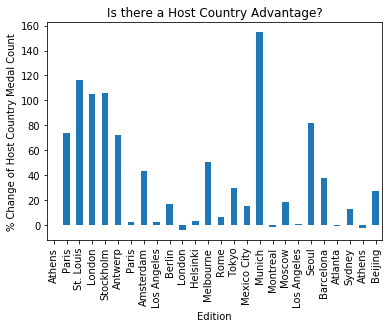

In [84]:
# Import pyplot
import matplotlib.pyplot as plt

# Extract influence['Change']: change
change = pd.Series(influence['Change'])

# Make bar plot of change: ax
ax = change.plot(kind = 'bar')

# Customize the plot to improve readability
ax.set_ylabel("% Change of Host Country Medal Count")
ax.set_title("Is there a Host Country Advantage?")
ax.set_xticklabels(editions['City'])

# Display the plot
plt.show()